In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import LinRegAC.utilsAC as utilsAC
import LinRegAC.linRegAC as linRegAC
import LinRegAC.crossValdAC as crossValdAC

In [2]:
CH_dataCols = ['vendor_name', 'model_name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']
CHdata = pd.read_csv('computer_hardware/machine.data', names=CH_dataCols)
CHdata

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [3]:
CHdata_x = CHdata[CHdata.columns[2:-2]]
CHdata_y = CHdata[CHdata.columns[-2]]

In [4]:
train_x, train_y, test_x, test_y = utilsAC.splitTrainTest(CHdata_x, CHdata_y, 0.8)

In [5]:
train_x, train_min, train_max = utilsAC.normMinMax(train_x, mode='train')
test_x = utilsAC.normMinMax(test_x, mode='test', train_min=train_min, train_max=train_max)

In [6]:
linReg1 = linRegAC.LinReg(mode=1)
linReg1.fit(train_x, train_y)
pred1 = linReg1.predict(test_x)
print(f'MSE: {utilsAC.getMse(test_y, pred1)}, RMSE: {utilsAC.getRmse(test_y, pred1)}')

Fitting completed.
Mode = 1, using Normal equation w = (X^T X)^-1 X^T y

MSE: 5883.524326483083, RMSE: 76.70413500250872


In [7]:
lrs = [0.01, 0.005, 0.003, 0.001]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'violet', 'purple']

In [8]:
hld_cv = crossValdAC.CrossVald(option='holdout')
gd_hld_train_costs, gd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 65.3757
Iteration  200 | Loss = 64.7677
Iteration  300 | Loss = 64.6272
Iteration  400 | Loss = 64.5846
Iteration  500 | Loss = 64.5710
Iteration  600 | Loss = 64.5666
Iteration  700 | Loss = 64.5652
Iteration  800 | Loss = 64.5647
Iteration  900 | Loss = 64.5645
Iteration 1000 | Loss = 64.5645
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 1934.1652607689114, RMSE: 43.97914574851257
----------------- lr : 0.005 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 51.1697
Iteration  200 | Loss = 47.8945
Iteration  300 | Loss = 46.9423
Iteration  400 | Loss = 46.5357
Iteration  500 | Loss = 46.3245
Iteration  600 | Loss = 46.2036
Iteration  700 | Loss = 46.1314
Iteration  800 | Loss = 46.0874
Iteration  900 | Loss = 46.0603
Iteration 1000 | Loss = 46.0437
Fitting

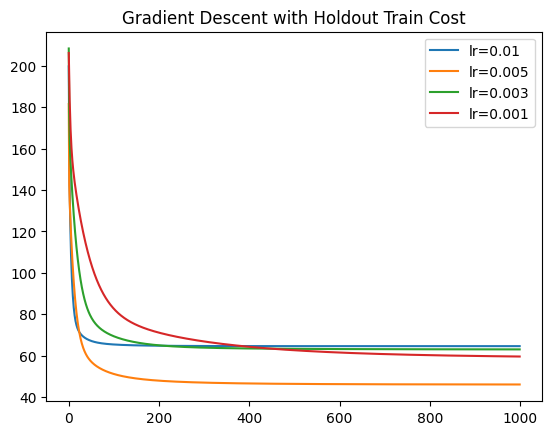

In [9]:
fig = plt.figure()
for i in range(len(gd_hld_train_costs)):
    plt.plot(gd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/gd_hld.png')

In [10]:
print(gd_hld_opt_model)

{'rmse': 43.97914574851257, 'lr': 0.01, 'w': array([-46.65076619,  72.41609164, 476.10406893, 372.02756983,
       154.31711585,   2.21295016, 234.9718377 ])}


In [11]:
sgd_hld_train_costs, sgd_hld_opt_model = hld_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Holdout Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 63.8938
Iteration  200 | Loss = 63.3970
Iteration  300 | Loss = 63.2325
Iteration  400 | Loss = 63.1695
Iteration  500 | Loss = 63.1451
Iteration  600 | Loss = 63.1356
Iteration  700 | Loss = 63.1320
Iteration  800 | Loss = 63.1306
Iteration  900 | Loss = 63.1300
Iteration 1000 | Loss = 63.1298
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2674.062761713099, RMSE: 51.711340745653644
----------------- lr : 0.005 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 68.2248
Iteration  200 | Loss = 66.0617
Iteration  300 | Loss = 65.5252
Iteration  400 | Loss = 65.2943
Iteration  500 | Loss = 65.1758
Iteration  600 | Loss = 65.1113
Iteration  700 | Loss = 65.0750
Iteration  800 | Loss = 65.0542
Iteration  900 | Loss = 65.0421
Iteration 1000 | Loss = 65.03

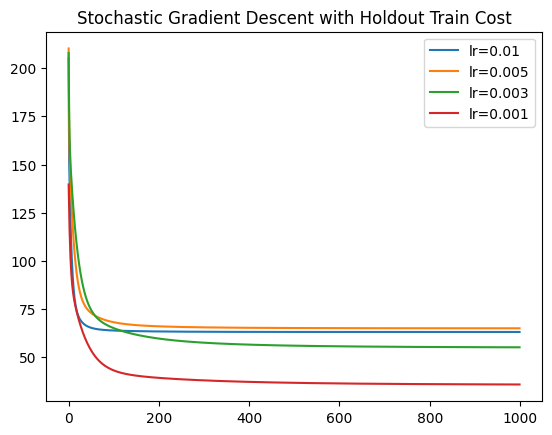

In [12]:
fig = plt.figure()
for i in range(len(sgd_hld_train_costs)):
    plt.plot(sgd_hld_train_costs[i], label=f'lr={lrs[i]}')
plt.legend()
plt.title('Stochastic Gradient Descent with Holdout Train Cost')
plt.show()
fig.savefig('plots/sgd_hld.png')

In [13]:
print(sgd_hld_opt_model)

{'rmse': 44.251552869821715, 'lr': 0.005, 'w': array([-58.22347359,  85.50054761, 500.10079609, 391.68639366,
       181.0650019 , -22.47658739, 250.4413182 ])}


In [14]:
montc_cv = crossValdAC.CrossVald(option='monte_carlo', monte_carlo=5)
gd_montc_train_costs, gd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 64.6833
Iteration  200 | Loss = 63.6583
Iteration  300 | Loss = 63.3252
Iteration  400 | Loss = 63.2058
Iteration  500 | Loss = 63.1623
Iteration  600 | Loss = 63.1463
Iteration  700 | Loss = 63.1404
Iteration  800 | Loss = 63.1383
Iteration  900 | Loss = 63.1375
Iteration 1000 | Loss = 63.1372
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2588.984066856833, RMSE: 50.882060363715944
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 58.7456
Iteration  200 | Loss = 58.0515
Iteration  300 | Loss = 57.9841
Iteration  400 | Loss = 57.9729
Iteration  500 | Loss = 57.9704
Iteration  600 | Loss = 57.9697
Iteration  700 | Loss = 57.9695
Iteration  800 | Loss = 57.9695
Iteration  900 | Loss = 57.9695
Iteration 1000 | Loss = 57.9695
Fitt

In [15]:
print(gd_montc_opt_model)

{'rmse': 59.016942820516, 'lr': 0.003, 'w': array([-49.27988166,  60.81787877, 166.67266464, 426.16255113,
       193.12523118, -98.58094655, 302.44403824])}


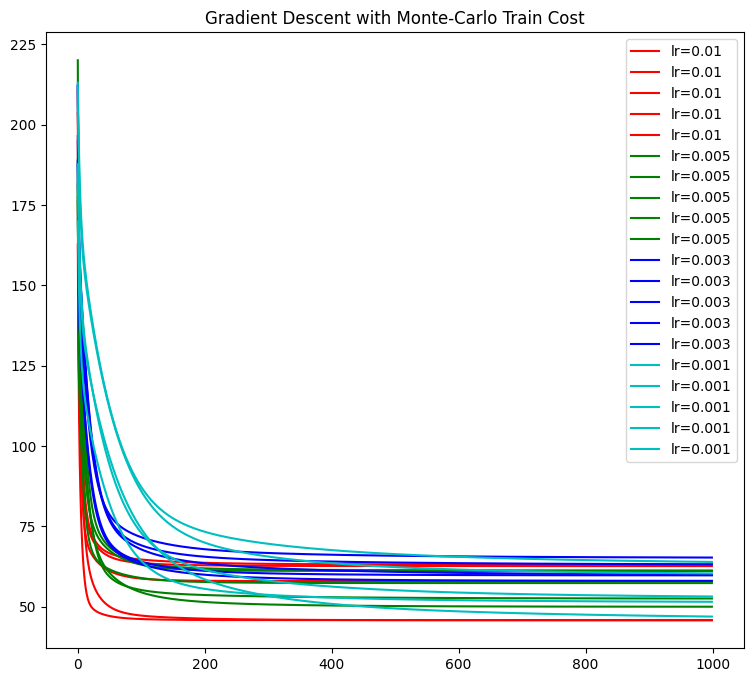

In [16]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_montc_train_costs)):
    for j in range(len(gd_montc_train_costs[i])):
        plt.plot(gd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/gd_montc.png')

In [17]:
sgd_montc_train_costs, sgd_montc_opt_model = montc_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing Monte Carlo Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 37.6247
Iteration  200 | Loss = 37.4734
Iteration  300 | Loss = 37.4527
Iteration  400 | Loss = 37.4484
Iteration  500 | Loss = 37.4475
Iteration  600 | Loss = 37.4472
Iteration  700 | Loss = 37.4471
Iteration  800 | Loss = 37.4471
Iteration  900 | Loss = 37.4471
Iteration 1000 | Loss = 37.4471
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 16029.313363066201, RMSE: 126.60692462525974
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 64.0257
Iteration  200 | Loss = 63.0894
Iteration  300 | Loss = 62.7809
Iteration  400 | Loss = 62.6620
Iteration  500 | Loss = 62.6155
Iteration  600 | Loss = 62.5973
Iteration  700 | Loss = 62.5903
Iteration  800 | Loss = 62.5875
Iteration  900 | Loss = 62.5865
Iteration 1000 | Loss = 6

In [18]:
print(sgd_montc_opt_model)

{'rmse': 55.993302216484416, 'lr': 0.003, 'w': array([-66.82286912,  89.77961045, 450.03327083, 413.05880782,
       124.72132065,  30.75983891, 270.08851923])}


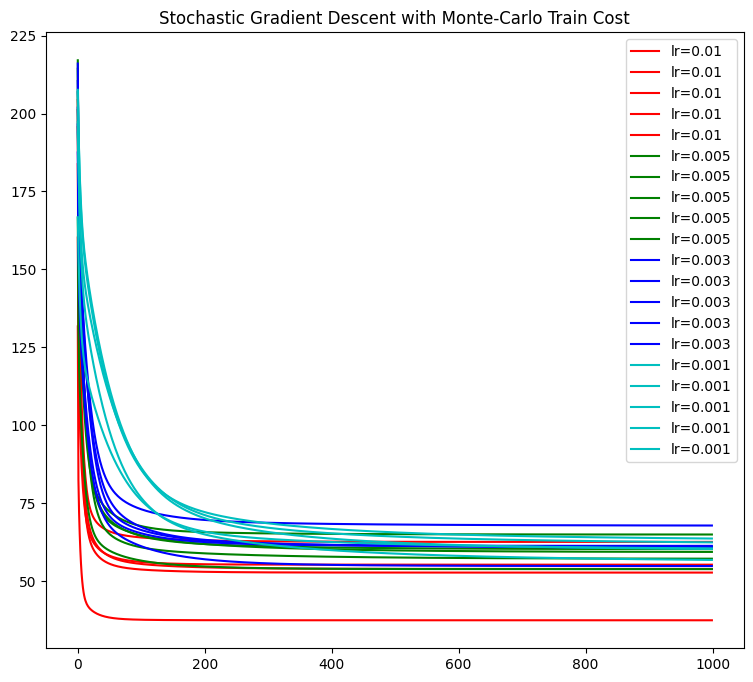

In [19]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_montc_train_costs)):
    for j in range(len(sgd_montc_train_costs[i])):
        plt.plot(sgd_montc_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with Monte-Carlo Train Cost')
plt.show()
fig.savefig('plots/sgd_montc.png')

In [20]:
kfold_cv = crossValdAC.CrossVald(option='k_fold', k_fold=6)
gd_kfold_train_costs, gd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.6538
Iteration  200 | Loss = 61.1061
Iteration  300 | Loss = 60.9316
Iteration  400 | Loss = 60.8733
Iteration  500 | Loss = 60.8539
Iteration  600 | Loss = 60.8473
Iteration  700 | Loss = 60.8452
Iteration  800 | Loss = 60.8444
Iteration  900 | Loss = 60.8442
Iteration 1000 | Loss = 60.8441
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2725.77184176174, RMSE: 52.208924924400996
----------------- lr : 0.01 -----------------
Implementing Batch Gradient Descent.
Iteration  100 | Loss = 61.4805
Iteration  200 | Loss = 60.9370
Iteration  300 | Loss = 60.8062
Iteration  400 | Loss = 60.7696
Iteration  500 | Loss = 60.7592
Iteration  600 | Loss = 60.7562
Iteration  700 | Loss = 60.7554
Iteration  800 | Loss = 60.7551
Iteration  900 | Loss = 60.7551
Iteration 1000 | Loss = 60.7550
Fitting co

In [21]:
print(gd_kfold_opt_model)

{'rmse': 65.11192054925816, 'lr': 0.005, 'w': array([-36.31805731,  47.99407659, 219.4418845 , 296.54214   ,
       154.0490933 ,  49.05686965, 178.69387732])}


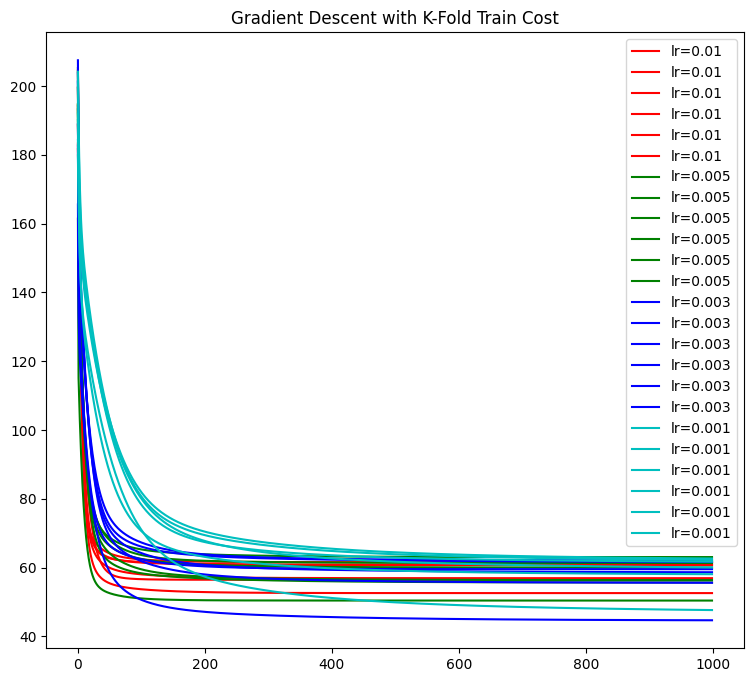

In [24]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(gd_kfold_train_costs)):
    for j in range(len(gd_kfold_train_costs[i])):
        plt.plot(gd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/gd_kfold.png')

In [25]:
sgd_kfold_train_costs, sgd_kfold_opt_model = kfold_cv.fit(CHdata_x, CHdata_y, lr=lrs, max_iter=1000, iter_step=100, eps=1e-5, stochGD=True)

Implementing K-Fold Cross Validation.
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 61.2294
Iteration  200 | Loss = 60.5533
Iteration  300 | Loss = 60.3599
Iteration  400 | Loss = 60.2985
Iteration  500 | Loss = 60.2780
Iteration  600 | Loss = 60.2708
Iteration  700 | Loss = 60.2681
Iteration  800 | Loss = 60.2669
Iteration  900 | Loss = 60.2664
Iteration 1000 | Loss = 60.2662
Fitting completed.
Mode = 2, using Gradient descent w = w - lr * grad, for overdetermined system

MSE: 2829.608637532958, RMSE: 53.194065811262796
----------------- lr : 0.01 -----------------
Implementing Stochastic Gradient Descent.
Iteration  100 | Loss = 56.5777
Iteration  200 | Loss = 55.8404
Iteration  300 | Loss = 55.6665
Iteration  400 | Loss = 55.6172
Iteration  500 | Loss = 55.6028
Iteration  600 | Loss = 55.5985
Iteration  700 | Loss = 55.5972
Iteration  800 | Loss = 55.5967
Iteration  900 | Loss = 55.5966
Iteration 1000 | Loss = 55.5965

In [26]:
print(sgd_kfold_opt_model)

{'rmse': 63.33398207663671, 'lr': 0.001, 'w': array([-54.08908441,  69.36532291, 384.68465429, 412.28248779,
       182.534032  ,  38.27422252, 212.40913117])}


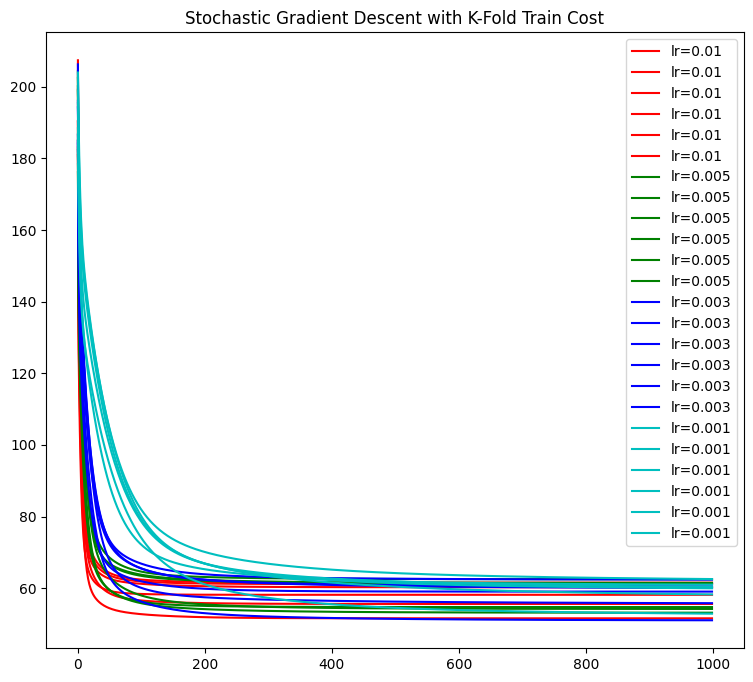

In [27]:
fig = plt.figure(figsize=(9, 8))
for i in range(len(sgd_kfold_train_costs)):
    for j in range(len(sgd_kfold_train_costs[i])):
        plt.plot(sgd_kfold_train_costs[i][j], label=f'lr={lrs[i]}', color=colors[i])
plt.legend()
plt.title('Stochastic Gradient Descent with K-Fold Train Cost')
plt.show()
fig.savefig('plots/sgd_kfold.png')